# Report for Kruskal's Algorithm

#### This is the report of implementation of Kruskal's Algorithm in Python. Despite code seems too complicated, comparison of the execution time of our implementation with the one of the networkx library shows that our implementation is much faster.

Importing necessary libraries:

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from networkx.algorithms import tree
import time
from tqdm import tqdm

Adding graph generator and implementation of Kruskal's Algorithm:

In [ ]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
    
    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)

    return G


def kruskal_algorithm(graph, algorithm=None) -> list[tuple[int, int, dict]]:
    '''
    Perform Kruskal's algorithm to find minimum panning tree
    Graph is given as list of edges with 
    Returns list of tuples with information about minimum planning tree edges
    '''
    sorted_edges = sorted(list(graph.edges(data=True)), key=lambda x: x[2]['weight'])
    list_of_nodes = [set([node]) for node in list(graph.nodes())]
    res = []
    while len(list_of_nodes) > 1:
        for edge in sorted_edges:
            for node in list_of_nodes:
                if edge[0] in node and edge[1] not in node:
                    list_of_nodes.remove(node)
                    for node_set in list_of_nodes:
                        if edge[1] in node_set:
                            list_of_nodes.remove(node_set)
                            list_of_nodes.append(node.union(node_set))
                            break
                    res.append(edge)
                    break
    return res

Function to measure time of execution:

In [65]:
def time_measurement(function, num_of_nodes, completeness, directed=False):
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        G = gnp_random_connected_graph(num_of_nodes, completeness, directed)
        start = time.time()
        function(G, algorithm='kruskal')
        end = time.time()
        
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS

Compare execution time of our implementation with the one of the networkx library on small unoriented complete graph:

In [67]:
print('Time taken for our algorithm on 10 nodes graph with 1 completeness: ', time_measurement(kruskal_algorithm, 10, 1))
print('Time taken for networkx algorithm on 10 nodes graph with 1 completeness: ', time_measurement(tree.minimum_spanning_tree, 10, 1))
print(f'Our algorithm works {int((time_measurement(tree.minimum_spanning_tree, 10, 1) / time_measurement(kruskal_algorithm, 10, 1)*100))} % faster than networkx algorithm')

100%|██████████| 1000/1000 [00:00<00:00, 1301.01it/s]


Time taken for our algorithm on 10 nodes graph with 1 completeness:  0.0002624537944793701


100%|██████████| 1000/1000 [00:01<00:00, 960.96it/s]


Time taken for networkx algorithm on 10 nodes graph with 1 completeness:  0.0005517024993896484


100%|██████████| 1000/1000 [00:00<00:00, 1901.72it/s]

Our algorithm works 204 % faster than networkx algorithm


100%|██████████| 1000/1000 [00:27<00:00, 35.76it/s]


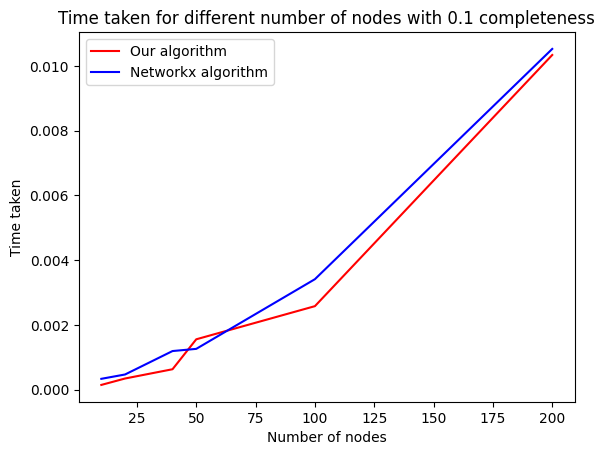

In [68]:
list_of_nodes = [10, 20, 40, 50, 100, 200]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement(kruskal_algorithm, elem, 0.1))
    time_taken_1.append(time_measurement(tree.minimum_spanning_tree, elem, 0.1))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 0.1 completeness')
plt.legend()
plt.show()

In [ ]:
list_of_nodes = [10, 20, 40, 50, 100, 200]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement(kruskal_algorithm, elem, 0))
    time_taken_1.append(time_measurement(tree.minimum_spanning_tree, elem, 0))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 0 completeness')
plt.legend()
plt.show()

In [ ]:
list_of_nodes = [10, 20, 40, 50, 100, 200]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement(kruskal_algorithm, elem, 1))
    time_taken_1.append(time_measurement(tree.minimum_spanning_tree, elem, 1))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 1 completeness')
plt.legend()
plt.show()